# Réseau de neurones à 2 couches

## Implémentation des photos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### Fonction d'initialisation 

In [2]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2,n1)
    b2 = np.random.randn(n2, 1)
    
    parametres ={
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

### Fonction du modèle - Forward Propagation

In [26]:
def forward_propagation(X, parametres):
    
    W1=parametres['W1']
    b1=parametres['b1']
    W2=parametres['W2']
    b2=parametres['b2']
    
    
    Z1 = W1.dot(X) + b1
    A1 = 1/ (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1/ (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations

### Fonction de coût

In [4]:
def log_loss(A,y):
    epsilon = 1e-15
    return -1/len(y) * np.sum(y*np.log(A + epsilon) + (1-y)*np.log(1-A + epsilon))

### Fonction gradient - Back propagation

In [5]:
def back_propagation(X, y, activations, parametres):
    
    A1=activations['A1']
    A2=activations['A2']
    W2=parametres['W2']
    m= y.shape[1]
    
    dZ2 = A2 - y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2= (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) *  A1 * (1-A1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1= (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

### Fonction update

In [6]:
def update(gradients, parametres, learning_rate):
    
    W1=parametres['W1']
    b1=parametres['b1']
    W2=parametres['W2']
    b2=parametres['b2']
    
    dW1=gradients['dW1']
    db1=gradients['db1']
    dW2=gradients['dW2']
    db2=gradients['db2']
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    
    
    return parametres

### Fonction de prédiction

In [7]:
def predict(X,parametres):
    
    activations = forward_propagation(X,parametres)
    
    A2=activations['A2']
    
    return (A2 >=0.5, A2)

## Assemblage final

Assemblage de toutes les fonctions afin de créer un réseau de neurones

In [25]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter=100): 
    
    #initialisation
    parametres = initialisation(X_train.shape[0],n1,y_train.shape[0]) #n1 = nbr de neurones dans la couche 1
    
    train_loss = []
    train_acc = []
    
    for i in tqdm(range(n_iter)): #tqdm est l'affichage d'une barre de progression
        
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i%10 == 0:   
            # calcul du coût
            train_loss.append(log_loss(activations['A2'],y_train))
            y_pred,_ = predict(X,parametres)
            train_acc.append(accuracy_score(y_train.flatten(),y_pred.flatten()))
            
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss)
    plt.title('Evolution de l\'erreur')
    plt.subplot(1,2,2)
    plt.plot(train_acc)
    plt.title('Evolution de la précision')
    plt.show()
        
    
    return parametres

def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.1, n_iter=100): 
    
    #initialisation
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0 ,n1,n2) #n1 = nbr de neurones dans la couche 1
    
    train_loss = []
    train_acc = []
    test_loss =[]
    test_acc = []
    
    for i in tqdm(range(n_iter)): #tqdm est l'affichage d'une barre de progression
        
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i%10 == 0:   
            # train
            train_loss.append(log_loss(activations['A2'],y_train))
            y_pred,_ = predict(X_train,parametres)
            train_acc.append(accuracy_score(y_train.flatten(),y_pred.flatten()))
            
            #test
            activations_test = forward_propagation(X_test, parametres)
            test_loss.append(log_loss(activations_test['A2'],y_test))
            y_pred,_ = predict(X_test,parametres)
            test_acc.append(accuracy_score(y_test.flatten(),y_pred.flatten()))
            
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.title('Evolution de l\'erreur')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.title('Evolution de la précision')
    plt.legend()
    plt.show()
    
        
    
    return parametres

## Entrainement sur un dataset

### Génération du dataset

In [9]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T                     # On transpose les 2 matrices afin de pouvoir les appliquer au réseau de neurone
y=y.reshape(1,(y.shape[0])) #

### Affichage du dataset

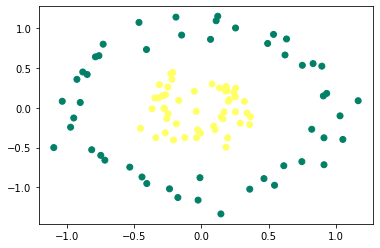

In [10]:
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

### Entrainement

100%|██████████| 1000/1000 [00:00<00:00, 10515.49it/s]


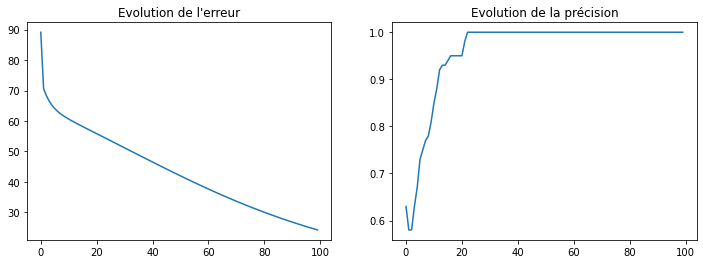

In [11]:
parametres = neural_network(X, y, n1=32,learning_rate=0.1, n_iter=1000)

## Chat vs Chien

In [12]:
from utilities import *

### Chargement du dataset


Le dataset contient :
- 1000 photos (500 chiens et 500 chats) de 64x64 pixels et 1000 étiquettes (chien ou chat) pour le train set
<br />
- 200 photos (100 chiens et 100 chats) de 64x64 pixels et 200 étiquettes (chien ou chat) pour le test set
<br />

<p>   
Les images sont codés sur 8 bits, soit 255 valeurs
<br />
0 --> Chat <br />1 --> Chien
<p>

In [13]:
X_train, y_train, X_test, y_test = load_data()

C:\Users\arthu\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


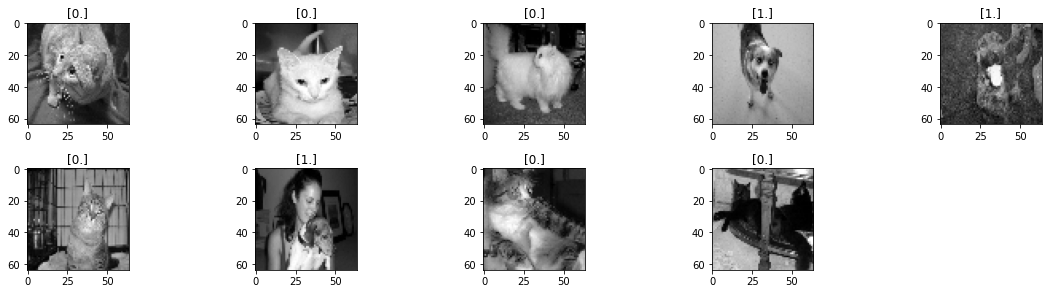

In [14]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

### Transposition et Redimensionnement des images

In [15]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1])/X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1,X_test.shape[-1])/X_train.max()


On ne sélectionne qu'une partie des images pour le moment

In [16]:
m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

100%|██████████| 8000/8000 [02:20<00:00, 57.01it/s]


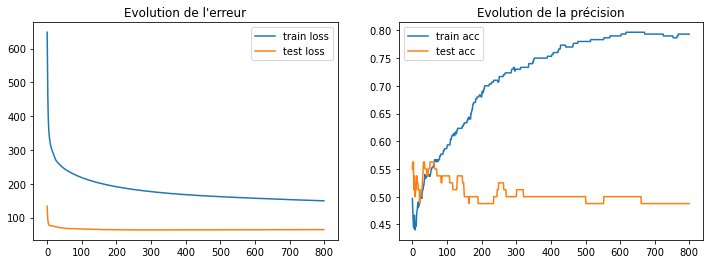

In [27]:
parametres1 = neural_network2(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate = 0.01, n_iter=8000)

In [20]:
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)
